In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.decomposition import PCA
import random

In [2]:
from keras import backend as k
from keras.utils.vis_utils import plot_model
from keras.datasets import cifar10
from tensorflow.keras import layers
import tensorflow as tf


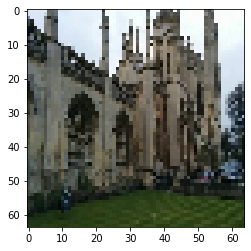

In [3]:
#importing dataset
import cv2
import os
import matplotlib.pyplot as plt


from keras.datasets import cifar100
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model, Sequential, load_model
import os
import copy
import matplotlib.pyplot as plt
import numpy as np
import math
import cv2

import matplotlib.pyplot as plt

path=r'C:\Users\HAMROUA\Desktop\Aymen\KingsCollege\\'

all_images = []
imagename={}
import glob, os

#TimePreprocessing
sequences=['seq1','seq2','seq3','seq4','seq5','seq6','seq7','seq8']    
for sequence in sequences:
    os.chdir(path+sequence)
    for file in glob.glob("*.png"):
        img = cv2.imread(file , 1)
        img = cv2.resize(img,(64, 64))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        all_images.append(img)
        imagename[sequence+'/'+file]=np.reshape(img, (1, 64, 64, 3)) / 255.

        
clusterpath=r'C:\Users\HAMROUA\Desktop\Aymen\Clusters\\'

import glob
arr = os.listdir(clusterpath)
clusterz={}
for i in range(0,len(arr)):
    os.chdir(clusterpath+'\\'+arr[i])
    seq = os.listdir(clusterpath+'\\'+arr[i])
    os.chdir(clusterpath+'\\'+arr[i]+'\\'+seq[0])
    for file in glob.glob("*.png"):
        clusterz[seq[0]+'/'+file]=arr[i]

In [4]:
def Loaddata(Nredundant):
    rows = []
    Y_test=[]
    Y_train=[]
    FinalData=[]
    with open(path+'dataset_features.csv') as f:
        for line in f:
            # strip whitespace
            line = line.strip()
            # separate the columns
            line = line.split(',')
            # save the line for use later
            rows.append(line)
    for i in range(0,len(rows)*4//5):
        image=imagename[rows[i][0]]
        Time=np.reshape([float(rows[i][1])]*64*Nredundant*3, ( 1,64, Nredundant, 3))
        X= np.reshape([float(rows[i][2])]*64*Nredundant*3, (1, 64, Nredundant, 3))
        Y= np.reshape([float(rows[i][3])]*64*Nredundant*3, (1,64, Nredundant, 3))
        Z= np.reshape([float(rows[i][4])]*64*Nredundant*3, (1,64, Nredundant, 3))
        W= np.reshape([float(rows[i][5])]*64*Nredundant*3, (1,64, Nredundant, 3))
        R= np.reshape([float(rows[i][6])]*64*Nredundant*3, (1,64, Nredundant, 3))

        Data= np.concatenate((image,Time,X,Y,Z,W,R), axis=2)
        FinalData.append(Data)
        Y_train.append(clusterz[rows[i][0]])

    X_train = np.reshape(FinalData, (len(FinalData), 64, Nredundant*6+64, 3))
    Y_train = np.reshape(Y_train, (len(Y_train), 1))

    FinalData=[]
    for i in range(len(rows)*4//5,len(rows)):
        image=imagename[rows[i][0]]
        Time=np.reshape([float(rows[i][1])]*64*Nredundant*3, ( 1,64, Nredundant, 3))
        X= np.reshape([float(rows[i][2])]*64*Nredundant*3, (1, 64, Nredundant, 3))
        Y= np.reshape([float(rows[i][3])]*64*Nredundant*3, (1,64, Nredundant, 3))
        Z= np.reshape([float(rows[i][4])]*64*Nredundant*3, (1,64, Nredundant, 3))
        W= np.reshape([float(rows[i][5])]*64*Nredundant*3, (1,64, Nredundant, 3))
        R= np.reshape([float(rows[i][6])]*64*Nredundant*3, (1,64, Nredundant, 3))

        Data= np.concatenate((image,Time,X,Y,Z,W,R), axis=2)
        FinalData.append(Data)
        Y_test.append(clusterz[rows[i][0]])

    X_test = np.reshape(FinalData, (len(FinalData), 64, Nredundant*6+64, 3))
    Y_test = np.reshape(Y_test, (len(Y_test), 1))
    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')
    return X_train,X_test,Y_train,Y_test

In [18]:
# #importing dataset
# import cv2
# import os
# import matplotlib.pyplot as plt



# import cv2
# import os
# import matplotlib.pyplot as plt


# from keras.datasets import cifar100
# from keras.layers import Conv2D, MaxPooling2D, UpSampling2D
# from keras.models import Model, Sequential, load_model
# import os
# import copy
# import matplotlib.pyplot as plt
# import numpy as np
# import math
# import cv2

# import matplotlib.pyplot as plt

# path=r'C:\Users\HAMROUA\Desktop\KingsCollege\\';

# all_images = []
# imagename={}
# import glob, os

# #TimePreprocessing
# sequences=['seq1','seq2','seq3','seq4','seq5','seq6','seq7','seq8']    
# for sequence in sequences:
#     os.chdir(path+sequence)
#     for file in glob.glob("*.png"):
#         img = cv2.imread(file , 1)
#         img = cv2.resize(img,(64, 64))
#         img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#         plt.imshow(img)
#         all_images.append(img)
#         imagename[sequence+'/'+file]=np.reshape(img, (1, 64, 64, 3)) / 255.

# rows = []

# FinalData=[]
# with open(path+'dataset.csv') as f:
#     for line in f:
#         # strip whitespace
#         line = line.strip()
#         # separate the columns
#         line = line.split(',')
#         # save the line for use later
#         rows.append(line)
# for i in range(0,len(rows)*2//3):
#     image=imagename[rows[i][0]]
#     Time=np.reshape([float(rows[i][1])]*64*3*3, ( 1,64, 3, 3))
#     X= np.reshape([float(rows[i][2])]*64*3*3, (1, 64, 3, 3))
#     Y= np.reshape([float(rows[i][3])]*64*3*3, (1,64, 3, 3))
#     Z= np.reshape([float(rows[i][4])]*64*3*3, (1,64, 3, 3))
#     W= np.reshape([float(rows[i][5])]*64*3*3, (1,64, 3, 3))
#     P= np.reshape([float(rows[i][6])]*64*3*3, (1,64, 3, 3))
#     Q= np.reshape([float(rows[i][7])]*64*3*3, (1,64, 3, 3))
#     R= np.reshape([float(rows[i][8])]*64*3*3, (1,64, 3, 3))
#     Data= np.concatenate((image,Time,X,Y,Z,W,P,Q,R), axis=2)
#     FinalData.append(Data)

# X_train = np.reshape(FinalData, (len(FinalData), 64, 88, 3))

# FinalData=[]
# for i in range(len(rows)*2//3,len(rows)):
#     image=imagename[rows[i][0]]
#     Time=np.reshape([float(rows[i][1])]*64*3*3, ( 1,64, 3, 3))
#     X= np.reshape([float(rows[i][2])]*64*3*3, (1, 64, 3, 3))
#     Y= np.reshape([float(rows[i][3])]*64*3*3, (1,64, 3, 3))
#     Z= np.reshape([float(rows[i][4])]*64*3*3, (1,64, 3, 3))
#     W= np.reshape([float(rows[i][5])]*64*3*3, (1,64, 3, 3))
#     P= np.reshape([float(rows[i][6])]*64*3*3, (1,64, 3, 3))
#     Q= np.reshape([float(rows[i][7])]*64*3*3, (1,64, 3, 3))
#     R= np.reshape([float(rows[i][8])]*64*3*3, (1,64, 3, 3))
#     Data= np.concatenate((image,Time,X,Y,Z,W,P,Q,R), axis=2)
#     FinalData.append(Data)
# X_test = np.reshape(FinalData, (len(FinalData), 64, 88, 3))

# #X_train = np.reshape(x_train, (len(x_train), 32, 32, 3)) / 255.
# #X_test = np.reshape(x_test, (len(x_test), 32, 32, 3)) / 255.

# Model Training

In [5]:
#Standardise the data


latent_dim=25
img_size = 64
num_channels = 3 #32 x 32 x 3

In [6]:

#performs random sampling on the nodes
class Sampling(layers.Layer):
    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))#the reparameterization trick!!Allows us to learn mean and variance
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

In [7]:
#Model
#encoder

def Myencoder(Nredundant,latent_dim):
    input_img = tf.keras.layers.Input(shape=(64,Nredundant*6+64,3),name="encoder_input")

    conv1 = tf.keras.layers.Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(input_img)
    conv1 = tf.keras.layers.Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)

    pool1 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = tf.keras.layers.Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = tf.keras.layers.Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)

    pool2 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = tf.keras.layers.Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = tf.keras.layers.Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)

    pool3 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = tf.keras.layers.Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = tf.keras.layers.Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)

    pool4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv4)

    flat = tf.keras.backend.int_shape(pool4)[1:]                  

    z_mean = tf.keras.layers.Dense(latent_dim,kernel_initializer='he_normal')(tf.keras.layers.Flatten()(pool4))#mean
    z_log_var = tf.keras.layers.Dense(latent_dim,kernel_initializer='he_normal')(tf.keras.layers.Flatten()(pool4))#variaince

    z =Sampling()([z_mean,z_log_var])

    encoder = tf.keras.models.Model(input_img,[z_mean,z_log_var,z])
    return encoder

In [8]:
Nredundant=5
encoder=Myencoder(Nredundant,latent_dim)
print((4+Nredundant//4)*1024)
print((4+Nredundant//4)*1024//(4*256))
encoder.summary()





5120
5
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 encoder_input (InputLayer)     [(None, 64, 94, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 64, 94, 32)   896         ['encoder_input[0][0]']          
                                                                                                  
 conv2d_1 (Conv2D)              (None, 64, 94, 32)   9248        ['conv2d[0][0]']                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 32, 47, 32)   0           ['conv2d_1[0][0]']               
                                                                                       

In [9]:
#decoder


def Mydecoder(Nredundant,latent_dim):
    number=[]
    number.append(Nredundant*6+64)
    compute=Nredundant*6+64
    mini=(4+Nredundant//3)*1024//(4*256)
    while compute>mini:
        compute=compute//2
        number.append(compute)
    if number[-2]%2!=0:
        a1=3
    else:
        a1=2
    if number[-3]%2!=0:
        a2=3
    else:
        a2=2
    if number[-4]%2!=0:
        a3=3
    else:
        a3=2
    print(number)
    decoder_input = tf.keras.layers.Input(shape=(latent_dim,), name="decoder_input")
    decoder_flat = tf.keras.layers.Dense((4+Nredundant//3)*1024,name = "decoder_flat")(decoder_input)
    decoder_reshape = tf.keras.layers.Reshape(target_shape=(4, (4+Nredundant//3)*1024//(4*256),256))(decoder_flat)
    decode_1 = tf.keras.layers.Conv2DTranspose(filters=256, kernel_size=(2,a1), strides=2, activation='relu', padding='valid')(decoder_reshape)
    
    decode_2 = tf.keras.layers.Conv2DTranspose(filters=128, kernel_size=(2,a2), strides=2, activation='relu', padding='valid')(decode_1)
    
    
    decode_3 = tf.keras.layers.Conv2DTranspose(filters=64, kernel_size=(2,a3), strides=2, activation='relu', padding='valid')(decode_2)
    decode_4 = tf.keras.layers.Conv2DTranspose(filters=32, kernel_size=(2,2), strides=2, activation='relu', padding='valid')(decode_3)
    decoder_output = tf.keras.layers.Conv2DTranspose(filters=3, kernel_size=(2,2), strides=1, activation='sigmoid', padding='same')(decode_4)
    decoder = tf.keras.models.Model(decoder_input, decoder_output, name="decoder_model")
    return decoder


In [10]:

decoder=Mydecoder(Nredundant,latent_dim)
decoder.summary()

[94, 47, 23, 11, 5]
Model: "decoder_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 decoder_input (InputLayer)  [(None, 25)]              0         
                                                                 
 decoder_flat (Dense)        (None, 5120)              133120    
                                                                 
 reshape (Reshape)           (None, 4, 5, 256)         0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 8, 11, 256)       393472    
 nspose)                                                         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 16, 23, 128)      196736    
 ranspose)                                                       
                                                                 
 conv2d_transpose_2 (Conv2DT  (No

In [16]:


class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder

    def train_step(self, data):
        if isinstance(data, tuple):
            data = data[0]
        with tf.GradientTape() as tape:#using GradientTape to define custom loss function
            z_mean, z_log_var, z = encoder(data)
            reconstruction = decoder(z)
            reconstruction_loss = tf.reduce_mean(
                keras.losses.MSE(data, reconstruction)#the reconstruction loss
            )
            reconstruction_loss *= 32 * 32
            kl_loss = 1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var)#KL divergence
            kl_loss = tf.reduce_mean(kl_loss)
            kl_loss *= -0.5
            total_loss = 0.2*reconstruction_loss + 0.8*kl_loss # Total loss =  MSE(reconstruction) + KL diveregence(how similar the distributions are) 
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        return {
            "loss": total_loss,
            "reconstruction_loss": reconstruction_loss,
            "kl_loss": kl_loss,
        }

In [17]:
Hist=[]
from tensorflow.keras.models import Model
from keras.models import load_model
from tensorflow.keras.models import Sequential, save_model


for  Nredundant in range(4,5,1):   
    encoder=Myencoder(Nredundant,latent_dim)
    decoder=Mydecoder(Nredundant,latent_dim)
    vae = VAE(encoder, decoder)
    vae.compile(optimizer=keras.optimizers.Adam(),run_eagerly=True)
    X_train,X_test,Y_train,Y_test=Loaddata(Nredundant)
    history = vae.fit(X_train, epochs=100, batch_size=20)
    Hist.append(history)




[88, 44, 22, 11, 5]
Epoch 1/100
63/63 [==============================] - 2s 30ms/step - loss: 27.9463 - reconstruction_loss: 137.0474 - kl_loss: 0.6711
Epoch 2/100
63/63 [==============================] - 2s 30ms/step - loss: 20.7271 - reconstruction_loss: 101.8464 - kl_loss: 0.4473
Epoch 3/100
63/63 [==============================] - 2s 30ms/step - loss: 19.8159 - reconstruction_loss: 97.2076 - kl_loss: 0.4679
Epoch 4/100
63/63 [==============================] - 2s 30ms/step - loss: 19.2707 - reconstruction_loss: 94.5113 - kl_loss: 0.4605
Epoch 5/100
63/63 [==============================] - 2s 31ms/step - loss: 18.8960 - reconstruction_loss: 92.7482 - kl_loss: 0.4330
Epoch 6/100
63/63 [==============================] - 2s 31ms/step - loss: 18.7350 - reconstruction_loss: 91.6642 - kl_loss: 0.5027
Epoch 7/100
63/63 [==============================] - 2s 31ms/step - loss: 18.3659 - reconstruction_loss: 90.1052 - kl_loss: 0.4311
Epoch 8/100
63/63 [==============================] - 2s 32ms/

Epoch 63/100
63/63 [==============================] - 2s 36ms/step - loss: 14.4732 - reconstruction_loss: 69.2526 - kl_loss: 0.7783
Epoch 64/100
63/63 [==============================] - 2s 34ms/step - loss: 14.5284 - reconstruction_loss: 69.5089 - kl_loss: 0.7833
Epoch 65/100
63/63 [==============================] - 2s 34ms/step - loss: 14.4880 - reconstruction_loss: 69.2770 - kl_loss: 0.7907
Epoch 66/100
63/63 [==============================] - 2s 34ms/step - loss: 14.5451 - reconstruction_loss: 69.5620 - kl_loss: 0.7908
Epoch 67/100
63/63 [==============================] - 2s 36ms/step - loss: 14.4883 - reconstruction_loss: 69.2952 - kl_loss: 0.7866
Epoch 68/100
63/63 [==============================] - 2s 33ms/step - loss: 14.4161 - reconstruction_loss: 68.9432 - kl_loss: 0.7843
Epoch 69/100
63/63 [==============================] - 2s 34ms/step - loss: 14.4376 - reconstruction_loss: 69.0253 - kl_loss: 0.7907
Epoch 70/100
63/63 [==============================] - 2s 33ms/step - loss: 1

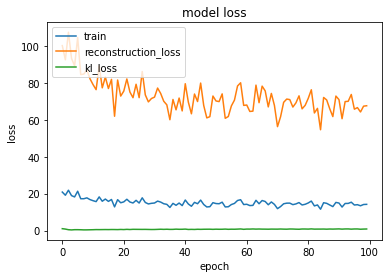

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['reconstruction_loss'])
plt.plot(history.history['kl_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'reconstruction_loss',"kl_loss"], loc='upper left')
plt.show()

In [ ]:
# encoder=Myencoder(Nredundant,latent_dim)
# decoder=Mydecoder(Nredundant,latent_dim)
# vae2 = VAE(encoder, decoder)
# vae2.compile(optimizer=keras.optimizers.Adam(),run_eagerly=True)

# vae2.load_weights(r'C:/Users/HAMROUA/Desktop/BackupDesktop/Desktop/Autoencoders-ImageClustering-main/save/test.h5')



# Image Clustering

In [ ]:
plt.imshow(X_train[2][0:64,0:64,:])


In [ ]:
alldataset=np.concatenate((X_test, X_train), axis=0)

Encoded=encoder.predict(alldataset)
Encoded=np.delete(Encoded,2,axis=0)
decoded_imgs=decoder.predict(Encoded[0])


print('Differance between images+attributes is:',sum(sum(sum(sum(abs(decoded_imgs-alldataset)))/(alldataset.shape[0]*alldataset.shape[1]*alldataset.shape[2]*alldataset.shape[3])))*100)

print(decoded_imgs.shape)
print('Differance between attributes is:',sum(sum(sum(sum(
    abs(decoded_imgs[:,0:64,65:88,:]-alldataset[:,0:64,65:88,:])
                        ))))/((int(alldataset.shape[0])*(88-65)*3*64)*100))


print('Differance between images is:',sum(sum(sum(sum(
    abs(decoded_imgs[:,0:64,0:64,:]-alldataset[:,0:64,0:64,:])
                        ))))/((int(alldataset.shape[0])*64*3*64)*100))
print('Image before:')
print(plt.imshow(alldataset[150][0:64,0:64,:]))


print(alldataset.shape)


In [ ]:
print('Image after:')
print(plt.imshow(decoded_imgs[150][0:64,0:64,:]))
# pred=decoded_imgs.copy()
# pred.resize(10000,50)

In [ ]:
# for cluster in range(10):
#     print('cluster: ', cluster)
#     a = np.array(Y_test[np.where(clustered_images == cluster)])
#     print(np.bincount(a[:,0]))
#     print("Probable cluster label : ",np.argmax(np.bincount(a[:,0])))

In [ ]:
def display_single_subplot(img, n_row, n_col, cell_num):
    ax = plt.subplot(n_row, n_col, cell_num)
    plt.imshow(img)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

def get_sorted_similarity_idx(encoder, decoder, img_to_find_idx, dataset):
#     encoder.compile()
#     encoder.run_eagerly = True
    from keras.losses import binary_crossentropy
    from tensorflow.keras.losses import cosine_similarity 

    Encoded=encoder.predict(dataset)
    Encoded=np.delete(Encoded,2,axis=0)
    encoded_images=decoder.predict(Encoded[0])




    
    encoded_images = encoded_images.reshape(encoded_images.shape[0], -1)

    
    #initializing vars to pass into tensorflow
    X_selected = [encoded_images[img_to_find_idx].tolist() for _ in range(encoded_images.shape[0])]
    X_all = encoded_images.tolist()

    X_selected_tf = tf.Variable(X_selected, tf.float32)
    X_all_tf = tf.Variable(X_all, tf.float32)
    loss_tf_cross = binary_crossentropy(X_selected_tf, X_all_tf)
    loss_tf_cosine = cosine_similarity(X_selected_tf, X_all_tf)

    similarity_sorted_cross = np.argsort(np.array(loss_tf_cross))[1:]
    similarity_sorted_cosine = np.argsort(np.array(loss_tf_cosine))[1:]

     #the same figure appears in X_all too, so remove it
    return loss_tf_cross,similarity_sorted_cross,loss_tf_cosine,similarity_sorted_cosine

In [ ]:
img_to_find_idx=10
loss_tf_cross,similarity_sorted_cross,loss_tf_cosine,similarity_sorted_cosine=get_sorted_similarity_idx(encoder, decoder, img_to_find_idx, alldataset)



print(loss_tf_cross,max(loss_tf_cross),min(loss_tf_cross))
print(loss_tf_cosine,max(loss_tf_cosine),min(loss_tf_cosine))


In [ ]:
n=10
fig = plt.figure(figsize=(n*2, n/1.5))
plt.gray()
fig.suptitle('First row: original image. Second row: most similar images. Third row: least similar images')

img_shape = (64, 64, 3)

#display original
display_single_subplot(alldataset[img_to_find_idx][0:64,0:64,:].reshape(img_shape), n_row=3, n_col=n, cell_num=1)
#display most similar
print('Similarity with Cross')
for i in range(n):
    similar_idx = similarity_sorted_cross[i]
    display_single_subplot(alldataset[similar_idx][0:64,0:64,:].reshape(img_shape), n_row=3, n_col=n, cell_num=n+i+1)


In [ ]:
fig = plt.figure(figsize=(n*2, n/1.5))
plt.gray()
print('Similarity with Cosine')
#display original
display_single_subplot(alldataset[img_to_find_idx][0:64,0:64,:].reshape(img_shape), n_row=3, n_col=n, cell_num=1)
for i in range(n):
    similar_idx = similarity_sorted_cosine[i]
    display_single_subplot(alldataset[similar_idx][0:64,0:64,:].reshape(img_shape), n_row=3, n_col=n, cell_num=n+i+1)


In [ ]:
print('Disimilarity with Cosine')

fig = plt.figure(figsize=(n*2, n/1.5))
plt.gray()
display_single_subplot(alldataset[img_to_find_idx][0:64,0:64,:].reshape(img_shape), n_row=3, n_col=n, cell_num=1)
for i in range(n):
    dissimilar_idx = similarity_sorted_cosine[-i-1]
    display_single_subplot(alldataset[dissimilar_idx][0:64,0:64,:].reshape(img_shape), n_row=3, n_col=n, cell_num=n+i+1)
plt.show()

In [ ]:
print('Disimilarity with Cross')

fig = plt.figure(figsize=(n*2, n/1.5))
plt.gray()
display_single_subplot(alldataset[img_to_find_idx][0:64,0:64,:].reshape(img_shape), n_row=3, n_col=n, cell_num=1)
for i in range(n):
    dissimilar_idx = similarity_sorted_cross[-i-1]
    display_single_subplot(alldataset[dissimilar_idx][0:64,0:64,:].reshape(img_shape), n_row=3, n_col=n, cell_num=n+i+1)
plt.show()

In [ ]:
for i in range(10):
    n = 10
    count = 0 
    print("Class ",i)
    indices = np.array(np.where(copy==i))
    print(indices)
    plt.figure(figsize=(20, 4))
    for j in range(n):
      # display original
        pos = random.randint(0,243)
        ax = plt.subplot(2, n,j + 1)
        plt.imshow(X_test[pos][0:64,0:64,:].reshape(64,64,3))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

      # display reconstruction
        ax = plt.subplot(2, n, j + 1 + n)
        plt.imshow(decoded_imgs[pos][0:64,0:64,:].reshape(64,64,3))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        count+=1
    plt.show()

The results of K-means is not really satisfactory. The images are more or less evenly distributed with no real majority in the cluster(>50% of the cluster size).There are a few classes that have not been represented.Perhaps using a more robust clustering algorithm for images might be needed.There is a major scope for improvement.

In [ ]:
#an attempt to reduce the dimensions so that k-means clustering can work better
pca = PCA(n_components=0.99)
Encoded=encoder.predict(alldataset)
Encoded=np.delete(Encoded,2,axis=0)

principalComponents = pca.fit_transform(Encoded[0])
print(principalComponents.shape)

# #K-means
kmeans=KMeans(n_clusters=50,init='k-means++',max_iter=1000)
clustered_images = kmeans.fit_predict(principalComponents)

In [ ]:
# Plot the clusters

import matplotlib.pyplot as plt

#filter rows of original data
filtered_label0 = principalComponents[clustered_images == 0]
filtered_label1 = principalComponents[clustered_images == 1]
filtered_label2 = principalComponents[clustered_images == 2]
filtered_label3 = principalComponents[clustered_images == 3]
filtered_label4 = principalComponents[clustered_images == 4]
filtered_label5 = principalComponents[clustered_images == 5]
filtered_label6 = principalComponents[clustered_images == 6]


#plotting the results

plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            s=200,                             # Set centroid size
            c='red')                           # Set centroid color


#Plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1] , color = 'blue')
plt.scatter(filtered_label1[:,0] , filtered_label1[:,1] , color = 'black')
plt.scatter(filtered_label2[:,0] , filtered_label2[:,1] , color = 'yellow')
plt.scatter(filtered_label3[:,0] , filtered_label3[:,1] , color = 'orange')
plt.scatter(filtered_label4[:,0] , filtered_label4[:,1] , color = 'cyan')
plt.scatter(filtered_label5[:,0] , filtered_label5[:,1] , color = 'green')
plt.scatter(filtered_label6[:,0] , filtered_label6[:,1] , color = 'pink')


plt.show()